<a href="https://colab.research.google.com/github/Nishikanta059/Paper-Implementation/blob/main/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

# LeNet5 Architecture

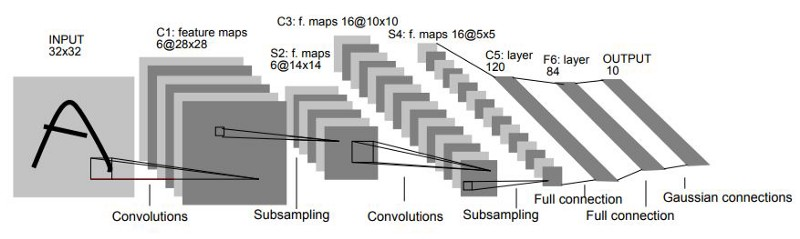

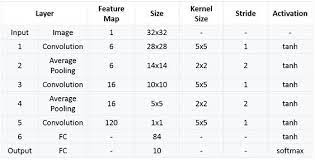

In [3]:

model = keras.Sequential(
    [

        layers.Conv2D(6,5,activation='tanh',input_shape=(28,28,1)),
        layers.AveragePooling2D(strides=(2,2)),
        layers.Conv2D(16,5,activation='tanh'),
        layers.AveragePooling2D(strides=(2,2)),
       layers.Flatten(),
        layers.Dense(120,activation='tanh'),

        layers.Dense(84,activation='tanh'),
        layers.Dense(10,activation='softmax')




    ]
)


In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

# *MNIST Dataset*

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
hist=model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 17s 7ms/step - loss: 0.3519 - accuracy: 0.9007 - val_loss: 0.1532 - val_accuracy: 0.9560
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1260 - accuracy: 0.9618 - val_loss: 0.0952 - val_accuracy: 0.9718
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0840 - accuracy: 0.9743 - val_loss: 0.0752 - val_accuracy: 0.9775
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0647 - accuracy: 0.9799 - val_loss: 0.0586 - val_accuracy: 0.9815
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0483 - val_accuracy: 0.9839
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0435 - accuracy: 0.9863 - val_loss: 0.0494 - val_accuracy: 0.9847
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0468 - val_accuracy: 0.9848
Epoch

In [9]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


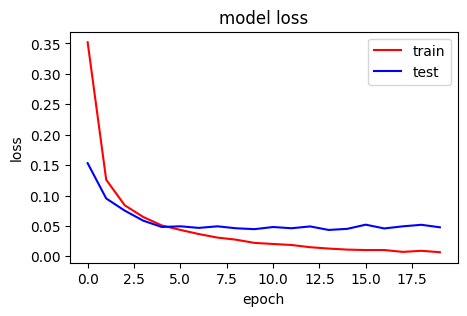

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.plot(hist.history['loss'],color='r')
plt.plot(hist.history['val_loss'],color='b')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

# Paper reference loss vs epochs
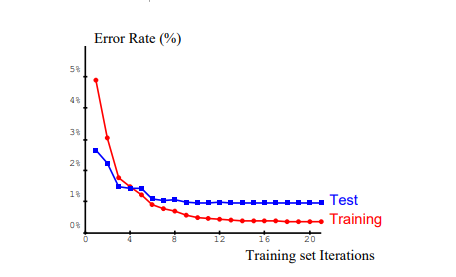

# Fashion MNIST

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [12]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)


x_train=x_train/255
x_test=x_test/255

y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [13]:
hist2=model.fit(x_train,y_train,batch_size=128,epochs=90,validation_data=(x_test,y_test))

Epoch 1/90
469/469 [==============================] - 3s 6ms/step - loss: 0.6700 - accuracy: 0.7732 - val_loss: 0.4989 - val_accuracy: 0.8167
Epoch 2/90
469/469 [==============================] - 2s 5ms/step - loss: 0.4400 - accuracy: 0.8387 - val_loss: 0.4375 - val_accuracy: 0.8400
Epoch 3/90
469/469 [==============================] - 2s 5ms/step - loss: 0.3936 - accuracy: 0.8546 - val_loss: 0.4149 - val_accuracy: 0.8480
Epoch 4/90
469/469 [==============================] - 2s 5ms/step - loss: 0.3655 - accuracy: 0.8668 - val_loss: 0.3757 - val_accuracy: 0.8641
Epoch 5/90
469/469 [==============================] - 3s 6ms/step - loss: 0.3479 - accuracy: 0.8716 - val_loss: 0.3774 - val_accuracy: 0.8631
Epoch 6/90
469/469 [==============================] - 2s 5ms/step - loss: 0.3327 - accuracy: 0.8776 - val_loss: 0.3774 - val_accuracy: 0.8614
Epoch 7/90
469/469 [==============================] - 2s 5ms/step - loss: 0.3208 - accuracy: 0.8809 - val_loss: 0.3581 - val_accuracy: 0.8709
Epoch 

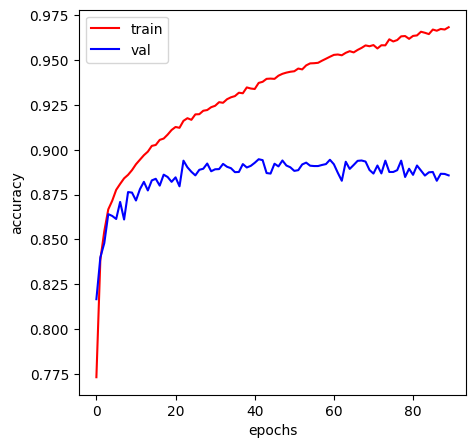

In [14]:
plt.figure(figsize=(5,5))
plt.plot(hist2.history['accuracy'],color='r')
plt.plot(hist2.history['val_accuracy'],color='b')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

# Conclusion

* LeNet 5 Model perfroms well in **MNIST** digit recognition dataset but

*   it is not performing well on **Fashion MNIST** dataset, it overfits the dataset.


We experimented with 'relu' activation function, its giving similar results.

So more dropout layers and convolutional layers needed for this more complex fashion MNIST dataset.